# Data science Specialisatie Opdracht
#### Uitgevoerd door Groep 4 bestaande uit: Ramon Vermeulen, Ruud van Rooijen, Nico Tammer en Thomas Lem
Voor de opdracht hebben wij gekozen om niet mee te doen aan de NEC, maar een dataset van Kaggle te pakken. Deze is als volgt: https://www.kaggle.com/c/digit-recognizer.
Met deze dataset willen wij 3 manieren van machinelearning vergelijken, en bepalen welke methode hiervoor het beste is met de kennis die wij gekregen hebben tijdens het vak van Data Science.

De dataset waar wij mee aan de slag gaan is het MNIST ("Modified National Institute of Standards and Technology") dataset. De dataset betreft handgeschreven cijfers van 0-9 opgeslagen in 28x28 plaatjes. In de dataset is dit opgeslagen door per rij 784 kolommen te hebben waar per pixel de waarde opgeslagen word. Op deze manier kunnen wij in Python het plaate reconstrueren en analyseren, of puur op de data analyseren. 

Voor het vergelijken van verschillende methode hebben wij gekozen voor: k-Means, k-Nearest Neighbor en Tensor Flow. 

#### Dit notebook betreft k-Means

## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline 

#### Om te zorgen dat de data bruikbaar is voor wat wij willen bereiken zullen wij deze eerst in moeten laden, en bewerken. 

In [3]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

#### We selecteren nu de data die wij willen gebruiken en halen de labels hier van af. We willen dat k-Means deze zelf verzint.

In [4]:
train = train[:5000]
train.cluster = train.drop('label', 1)

#### We vragen k-Means om 10 clusters te vinden (0-9) en laten hem trainen met onze train data

In [5]:
kmnummers = KMeans(n_clusters = 10, random_state = 0, init='k-means++').fit(train.cluster)

#### Hier zien we helaas niet veel in omdat het over zo ongelovelijk veel data gaat

In [6]:
kmnummers.cluster_centers_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

#### Dan maar de clusters toevoegen aan een tabel zodat we deze kunnen printen.

In [7]:
train['cluster'] = kmnummers.labels_
traincluster = train.sort_values(by='cluster')

#### Helaas zien we hier dat het hij het helemaal niet goed heeft gedaan. Dit heeft er waarschijnlijk mee te maken dat k-Means heel gevoelig is voor outliers.

In [8]:
data = pd.DataFrame(columns=['label', 'cluster'])
data.label = traincluster['label']
data.cluster = traincluster['cluster']

data

,label,cluster
1884,3,0
1271,3,0
1270,5,0
4052,8,0
4046,5,0
4040,5,0
2927,8,0
2930,8,0
2931,6,0
2932,3,0


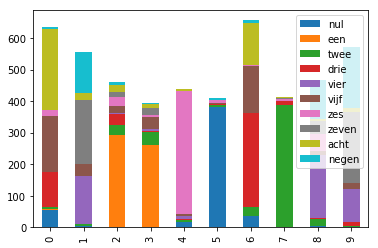

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

columns = ['nul', 'een', 'twee', 'drie', 'vier', 'vijf', 'zes', 'zeven', 'acht', 'negen']
dataframe = pd.DataFrame(columns=columns)

cluster = 0

for i in range(10):
    nul = data[(data['cluster'] == cluster) & (data['label'] == 0)]['label'].count()
    een = data[(data['cluster'] == cluster) & (data['label'] == 1)]['label'].count()
    twee = data[(data['cluster'] == cluster) & (data['label'] == 2)]['label'].count()
    drie = data[(data['cluster'] == cluster) & (data['label'] == 3)]['label'].count()
    vier = data[(data['cluster'] == cluster) & (data['label'] == 4)]['label'].count()
    vijf = data[(data['cluster'] == cluster) & (data['label'] == 5)]['label'].count()
    zes = data[(data['cluster'] == cluster) & (data['label'] == 6)]['label'].count()
    zeven = data[(data['cluster'] == cluster) & (data['label'] == 7)]['label'].count()
    acht = data[(data['cluster'] == cluster) & (data['label'] == 8)]['label'].count()
    negen = data[(data['cluster'] == cluster) & (data['label'] == 9)]['label'].count()
    
    dataframe.loc[cluster] = [nul, een, twee, drie, vier, vijf, zes, zeven, acht, negen]
    cluster = cluster + 1
    


dataframe.plot(kind='bar', stacked=True)

In de bovenstaande plot is nog een visualisatie te zien dat kmeans erg gevoellig is voor outliers. Wel is te zien dat hij de twee, nul en zes vrij goed heeft ingedeeld. Aan de andere kant vind het algorithme het moeilijk om bijvoorbeeld een onderscheid te maken tussen de zeven, negen en vier.